In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1


In [0]:
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [3]:
!ls

sample_data


In [4]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2020-03-30 09:11:29--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  13.3MB/s    in 48s     

2020-03-30 09:12:17 (8.92 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [5]:
!unzip  -o Food-5K.zip

Streaming output truncated to the last 5000 lines.
  inflating: Food-5K/training/1_1223.jpg  
  inflating: Food-5K/training/1_1237.jpg  
  inflating: Food-5K/training/0_1223.jpg  
  inflating: Food-5K/training/1_349.jpg  
  inflating: Food-5K/training/1_70.jpg  
  inflating: Food-5K/training/1_64.jpg  
  inflating: Food-5K/training/0_628.jpg  
  inflating: Food-5K/training/0_166.jpg  
  inflating: Food-5K/training/1_375.jpg  
  inflating: Food-5K/training/1_413.jpg  
  inflating: Food-5K/training/0_600.jpg  
  inflating: Food-5K/training/1_407.jpg  
  inflating: Food-5K/training/0_614.jpg  
  inflating: Food-5K/training/1_58.jpg  
  inflating: Food-5K/training/0_172.jpg  
  inflating: Food-5K/training/1_361.jpg  
  inflating: Food-5K/training/0_199.jpg  
  inflating: Food-5K/training/0_1009.jpg  
  inflating: Food-5K/training/0_827.jpg  
  inflating: Food-5K/training/0_9.jpg  
  inflating: Food-5K/training/0_833.jpg  
  inflating: Food-5K/training/1_1009.jpg  
  inflating: Food-5K/trai

In [6]:
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [0]:
!mv Food-5K/* .

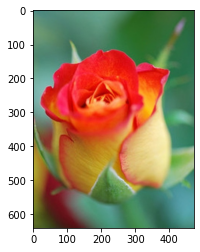

In [8]:
plt.imshow(image.load_img('training/0_808.jpg'))
plt.show()

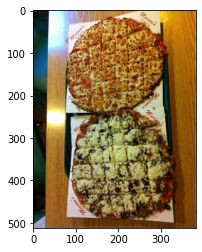

In [9]:
plt.imshow(image.load_img('training/1_616.jpg'))
plt.show()

In [0]:
!mkdir data

In [0]:
!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/test/nonfood
!mkdir data/test/food

In [0]:
!mv training/0*.jpg data/train/nonfood
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/nonfood
!mv validation/1*.jpg data/test/food

In [0]:
train_path = 'data/train'
valid_path = 'data/test'

In [0]:
IMAGE_SIZE = [200, 200]

In [0]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [17]:
folders = glob(train_path + '/*')
folders

['data/train/food', 'data/train/nonfood']

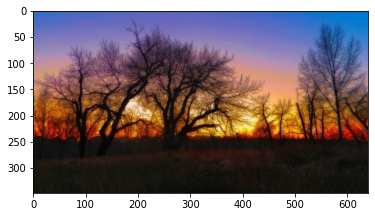

In [18]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [0]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False)

In [0]:
x = Flatten()(ptm.output)

In [0]:
model = Model(inputs=ptm.input, outputs=x)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [0]:
gen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [28]:
batch_size = 128
train_generator = gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary'
)
valid_generator = gen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='binary'
)

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
Ntrain = len(image_files)
Ntest = len(valid_image_files)
feat = model.predict(np.random.random([1] + IMAGE_SIZE + [3]))
D = feat.shape[1]
X_train = np.zeros((Ntrain, D))
Y_train = np.zeros(Ntrain)
X_test = np.zeros((Ntest, D))
Y_test = np.zeros(Ntest)

In [34]:
i = 0
for x,y in train_generator:
  features = model.predict(x)
  sz = len(y)
  X_train[i:i+sz] = features
  Y_train[i:i+sz] = y
  i += sz
  print(i)
  if i >= Ntrain:
    print("breaking")
    break
print(i)


128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2616
2744
2872
3000
breaking
3000


In [37]:
i = 0
for x,y in valid_generator:
  features = model.predict(x)
  sz = len(y)
  X_test[i:i+sz] = features
  Y_test[i:i+sz] = y
  i += sz
  print(i)
  if i>=Ntest:
    print("breaking")
    break
print(i)

128
232
360
488
616
744
872
1000
breaking
1000


In [38]:
X_train.max(), X_train.min()

(650.8261108398438, 0.0)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2  = scaler.fit_transform(X_train)
X_test2 = scaler.fit_transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train2, Y_train)
print(logr.score(X_train2, Y_train))
print(logr.score(X_test2, Y_test))

1.0
0.983


In [0]:
i = Input(shape=(D,))
x = Dense(1, activation='sigmoid')(i)
linearmodel = Model(i,x)

In [0]:
linearmodel.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [43]:
r = linearmodel.fit(X_train, Y_train, batch_size=128, epochs=10,validation_data=(X_test, Y_test))

Epoch 1/10
24/24 [==============================] - 0s 14ms/step - loss: 1.3178 - accuracy: 0.9180 - val_loss: 0.3092 - val_accuracy: 0.9820
Epoch 2/10
24/24 [==============================] - 0s 9ms/step - loss: 0.1058 - accuracy: 0.9917 - val_loss: 0.3499 - val_accuracy: 0.9820
Epoch 3/10
24/24 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.9987 - val_loss: 0.3515 - val_accuracy: 0.9830
Epoch 4/10
24/24 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.3354 - val_accuracy: 0.9840
Epoch 5/10
24/24 [==============================] - 0s 9ms/step - loss: 9.2570e-06 - accuracy: 1.0000 - val_loss: 0.3132 - val_accuracy: 0.9810
Epoch 6/10
24/24 [==============================] - 0s 9ms/step - loss: 2.3846e-05 - accuracy: 1.0000 - val_loss: 0.3122 - val_accuracy: 0.9810
Epoch 7/10
24/24 [==============================] - 0s 9ms/step - loss: 6.8112e-06 - accuracy: 1.0000 - val_loss: 0.3118 - val_accuracy: 0.9820
Epoch 8

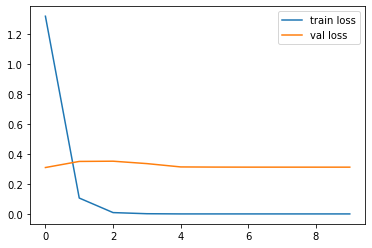

In [44]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

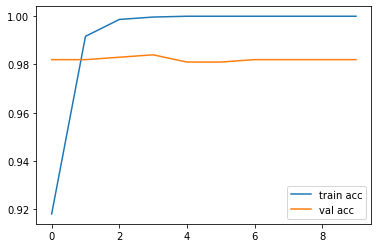

In [45]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()